Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

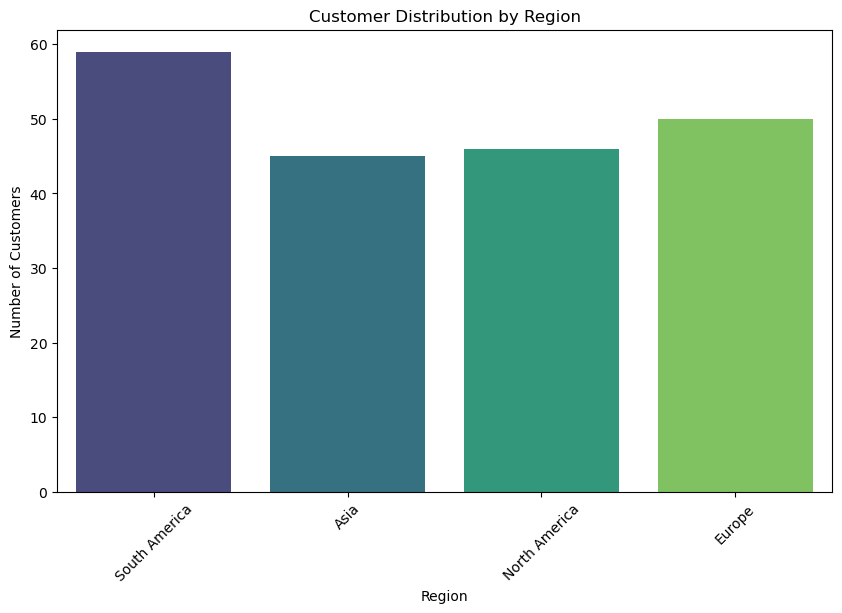

C:\Users\revat\AppData\Local\Temp\ipykernel_14100\2544113881.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_avg_price, x='Category', y='Price', palette='viridis')


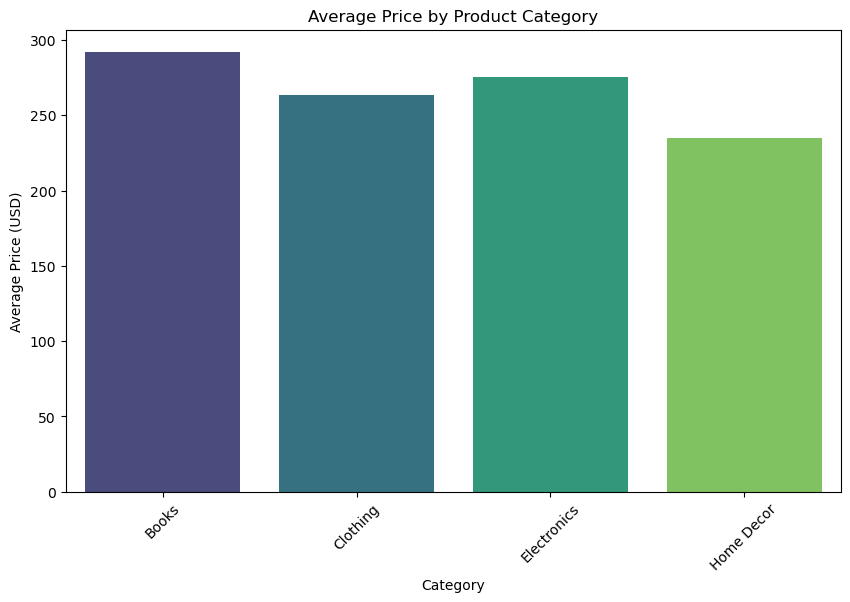

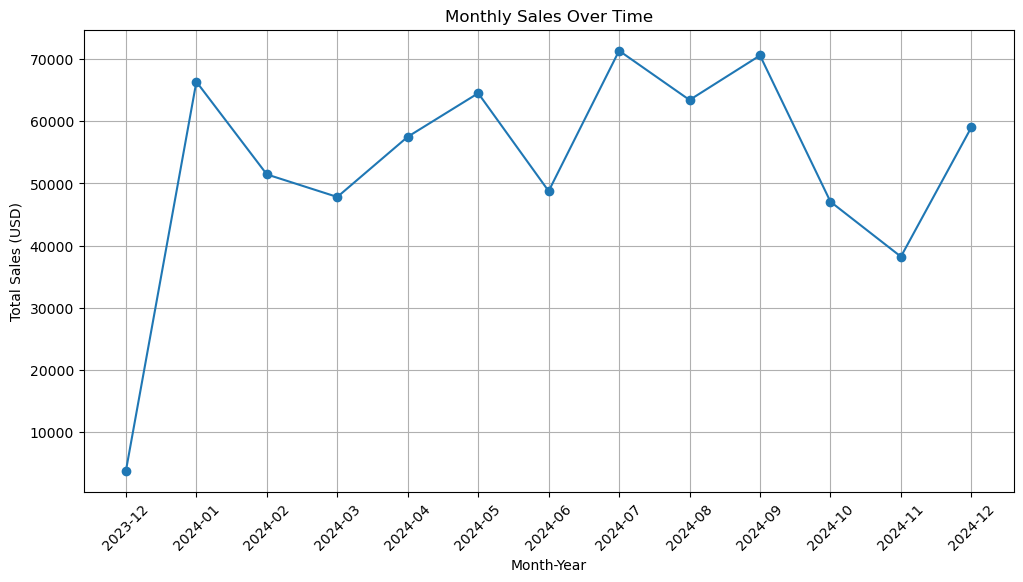

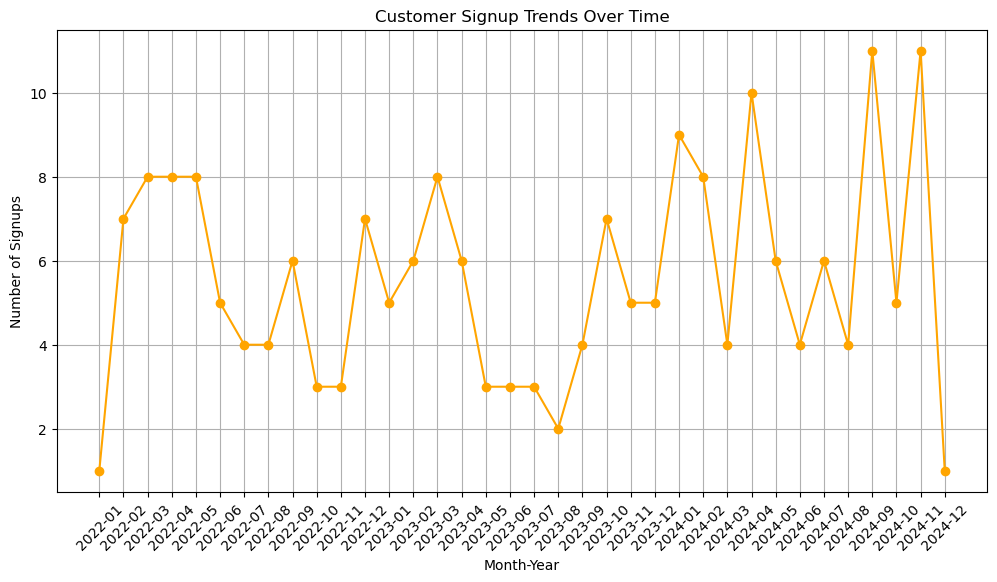


Top Revenue-Contributing Product Categories:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


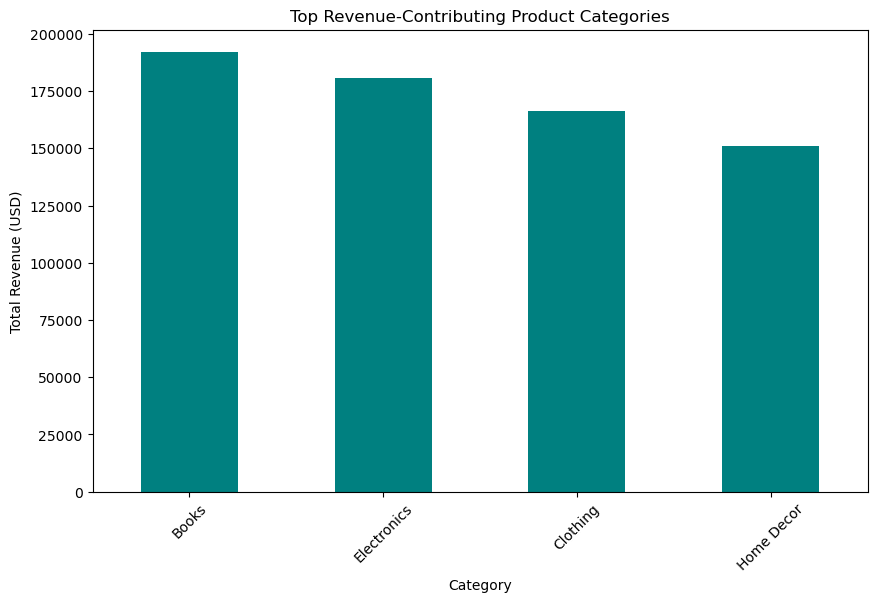


Average Transaction Size by Region:
Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64


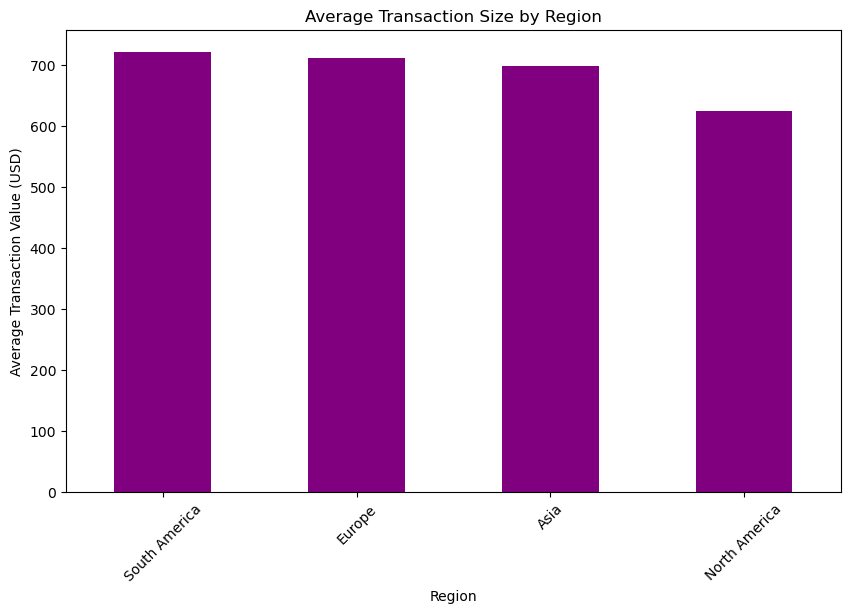

The top-selling product category is Books.
The region with the most customers is South America.
The month with the highest customer signups is 2024-09 with 11 signups.
The product category generating the highest revenue is Books.
The region with the highest average transaction size is South America.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Preview datasets
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

# Data Cleaning
# Checking for missing values
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Ensure TotalValue is numeric
transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'], errors='coerce')

# Convert Price to numeric, forcing errors to NaN
products['Price'] = pd.to_numeric(products['Price'], errors='coerce')

# EDA: Customer Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', hue='Region', palette='viridis', legend=False)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# EDA: Product Analysis
# Ensure that Price is numeric and we remove any non-numeric entries
products_cleaned = products.dropna(subset=['Price'])

# Group by Category and calculate mean Price
category_avg_price = products_cleaned.groupby('Category')['Price'].mean().reset_index()

# Plotting the Average Price by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_avg_price, x='Category', y='Price', palette='viridis')
plt.title('Average Price by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()

# EDA: Transactions Over Time
transactions['MonthYear'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('MonthYear')['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['MonthYear'].astype(str), monthly_sales['TotalValue'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Additional EDA: Customer Signup Trends
customers['SignupMonthYear'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('SignupMonthYear').size().reset_index(name='Signups')

plt.figure(figsize=(12, 6))
plt.plot(signup_trends['SignupMonthYear'].astype(str), signup_trends['Signups'], marker='o', color='orange')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Additional EDA: Top Revenue-Contributing Product Categories
top_revenue_categories = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop Revenue-Contributing Product Categories:")
print(top_revenue_categories)

plt.figure(figsize=(10, 6))
top_revenue_categories.plot(kind='bar', color='teal')
plt.title('Top Revenue-Contributing Product Categories')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

# Additional EDA: Average Transaction Size by Region
avg_transaction_size = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
print("\nAverage Transaction Size by Region:")
print(avg_transaction_size)

plt.figure(figsize=(10, 6))
avg_transaction_size.plot(kind='bar', color='purple')
plt.title('Average Transaction Size by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.xticks(rotation=45)
plt.show()

# Derive Insights
# Top-selling product category
top_category = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().idxmax()
print(f"The top-selling product category is {top_category}.")

# Region with most customers
top_region = customers['Region'].value_counts().idxmax()
print(f"The region with the most customers is {top_region}.")

# Month with highest customer signups
top_signup_month = signup_trends.sort_values(by='Signups', ascending=False).iloc[0]
print(f"The month with the highest customer signups is {top_signup_month['SignupMonthYear']} with {top_signup_month['Signups']} signups.")

# Category generating the highest revenue
top_revenue_category = top_revenue_categories.idxmax()
print(f"The product category generating the highest revenue is {top_revenue_category}.")

# Region with highest average transaction size
top_avg_transaction_region = avg_transaction_size.idxmax()
print(f"The region with the highest average transaction size is {top_avg_transaction_region}.")
